In [1]:
import numpy as np
from IPython.display import display
import pandas as pd

In [77]:
df_Items = pd.read_csv("Items.csv")
display("df_Items" , df_Items)
df_order_item = pd.read_csv("order_item.csv")
display("df_order_item" ,df_order_item)
df_orders = pd.read_csv("orders.csv")
display("df_orders" ,df_orders)
df_customers = pd.read_csv("customers.csv")
display("df_customers" ,df_customers)

# ניתוח מידע
# 1
df_Items.groupby('item_name')[['item_price']].mean() 

# 2
df_customer_max = df_order_item.merge(df_orders[['order_id', 'customer_id']], on='order_id', how='inner') .merge(df_customers[['id', 'first_name', 'last_name']], left_on='customer_id', right_on='id', how='inner')
df_customer_max.groupby(['first_name', 'last_name'])['quantity'].sum().sort_values(ascending=False).head(1)

# 3
df_order_price = df_order_item.merge(df_Items[['id', 'item_price']], left_on='item_id', right_on='id', how='left')
df_order_price['total_price'] = df_order_price['item_price'] * df_order_price['quantity']
display(df_order_price)

# 4
df_order_price.groupby('item_id')[['total_price']].sum() 

# 5

display(df_order_price.agg({'item_id': ['max', 'min', 'mean']}))

# 6
pivot_customers = df_customers.pivot_table( index='nationallity', columns='gender', values='first_name', aggfunc='count')
display(pivot_customers)






'df_Items'

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability
0,26,Action Camera,Photography Equipment,2694.25,NaN,Bose,False
1,37,Antivirus Software,Software,4186.62,NaN,NaN,False
2,11,Blu-Ray Player,Video Players and Recorders,3382.86,704.0,ASUS,True
3,25,Camcorder,Photography Equipment,860.01,870.0,Bose,True
4,7,Camera,Photography Equipment,2366.72,458.0,Microsoft,True
5,48,Camera,Photography Equipment,2039.08,471.0,Panasonic,True
6,28,Camera,NaN,695.71,NaN,Sony,False
7,18,Computer Monitor,Computers and Accessories,4076.35,1205.0,Bose,True
8,27,Dash Camera,Photography Equipment,1283.99,550.0,Lenovo,True
9,3,Desktop,Computers and Accessories,1121.84,334.0,HP,True


'df_order_item'

,id,order_id,item_id,quantity
0,1,337,10.0,2
1,2,430,27.0,6
2,3,430,36.0,2
3,4,508,46.0,1
4,5,229,27.0,2
...,...,...,...,...
995,996,594,24.0,2
996,997,330,32.0,8
997,998,472,10.0,3
998,999,222,29.0,1


'df_orders'

,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source
0,1,477.0,576 Cordelia Place,2.0,2023-12-05,GIFT_CARD,WEBSITE
1,2,93.0,4664 6th Drive,4.0,2023-08-17,CASH,STORE
2,3,474.0,8766 4th Point,4.0,2023-02-25,CHECK,STORE
3,4,333.0,31 Bonner Way,3.0,2023-02-04,CASH,STORE
4,5,436.0,20352 Shelley Way,5.0,2023-06-01,CASH,STORE
...,...,...,...,...,...,...,...
595,596,110.0,26 Hudson Lane,5.0,2023-10-30,CREDIT_CARD,WEBSITE
596,597,209.0,37392 Sullivan Park,4.0,2023-08-23,CREDIT_CARD,WEBSITE
597,598,480.0,1473 Ilene Drive,4.0,2023-09-11,CASH,STORE
598,599,72.0,2 Nancy Crossing,4.0,2023-02-09,CASH,STORE


'df_customers'

,id,first_name,last_name,gender,age,nationallity,joining_date,phone_number,email
0,1,Eadie,Maffeo,Female,41.0,France,11/01/2022,534-341-9052,emaffeo0@smh.com.au
1,2,Hammad,Brewerton,Male,56.0,Isreal,30/09/2022,999-994-0510,hbrewerton1@discovery.com
2,3,Terrell,Bris,Male,43.0,India,NaN,980-455-5208,tbris2@yale.edu
3,4,Frannie,Morewood,Male,84.0,France,26/05/2021,979-187-1493,fmorewood3@vistaprint.com
4,5,Sophi,Fleet,Female,33.0,Sweden,19/07/2021,991-853-9984,sfleet4@unicef.org
...,...,...,...,...,...,...,...,...,...
495,496,Renado,Monard,Male,53.0,India,NaN,399-472-4819,rmonarddr@yale.edu
496,497,Kalina,Luno,Female,30.0,Italy,16/10/2022,659-768-2522,klunods@friendfeed.com
497,498,Viv,Callander,Female,44.0,France,24/02/2021,447-685-9318,vcallanderdt@icq.com
498,499,Georg,Raper,Male,41.0,Germany,24/04/2022,863-207-4830,graperdu@homestead.com


,id_x,order_id,item_id,quantity,id_y,item_price,total_price
0,1,337,10.0,2,10.0,453.85,907.70
1,2,430,27.0,6,27.0,1283.99,7703.94
2,3,430,36.0,2,36.0,3256.88,6513.76
3,4,508,46.0,1,46.0,1606.65,1606.65
4,5,229,27.0,2,27.0,1283.99,2567.98
...,...,...,...,...,...,...,...
995,996,594,24.0,2,24.0,4449.99,8899.98
996,997,330,32.0,8,32.0,1523.27,12186.16
997,998,472,10.0,3,10.0,453.85,1361.55
998,999,222,29.0,1,29.0,4227.36,4227.36


,item_id
max,50.000000
min,1.000000
mean,25.746875


gender,Agender,Bigender,Female,Genderfluid,Genderqueer,Male,Non-binary,Polygender
nationallity,,,,,,,,
Argentina,1.0,NaN,10.0,1.0,NaN,9.0,NaN,1.0
Brazil,NaN,NaN,6.0,NaN,NaN,17.0,2.0,1.0
Chile,1.0,NaN,14.0,NaN,NaN,9.0,NaN,NaN
China,NaN,NaN,5.0,1.0,1.0,9.0,NaN,1.0
France,1.0,NaN,15.0,1.0,NaN,10.0,NaN,NaN
Germany,NaN,NaN,12.0,NaN,NaN,3.0,NaN,1.0
India,1.0,NaN,8.0,NaN,NaN,15.0,NaN,NaN
Isreal,2.0,1.0,20.0,5.0,1.0,31.0,NaN,2.0
Italy,NaN,NaN,15.0,NaN,2.0,11.0,NaN,NaN


In [82]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\naama\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

<Axes: title={'center': 'customer segmentation'}, xlabel='gender', ylabel='number of customers'>

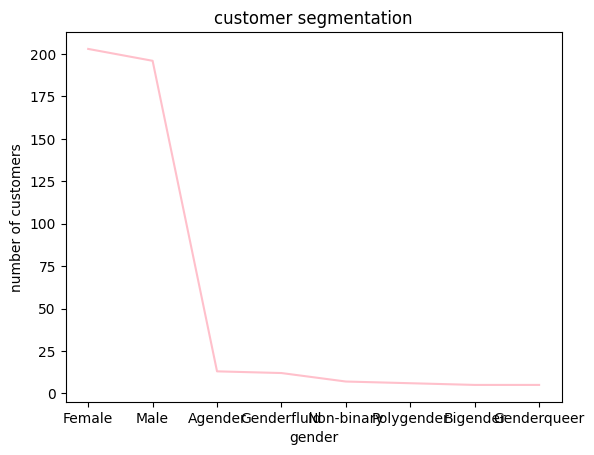

In [100]:
# גרפים 

# 1
df_customers['gender'].value_counts().plot( title='customer segmentation', ylabel='number of customers', xlabel='gender', color=['pink'])



<Axes: title={'center': 'customer segmentation'}, xlabel='nationallity', ylabel='number of customers'>

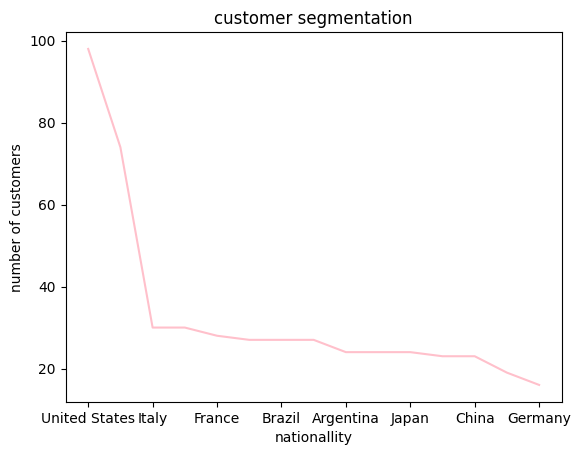

In [102]:
# 2

df_customers['nationallity'].value_counts().plot( title='customer segmentation', ylabel='number of customers', xlabel='nationallity', color=['pink'])


AttributeError: Rectangle.set() got an unexpected keyword argument 'title'

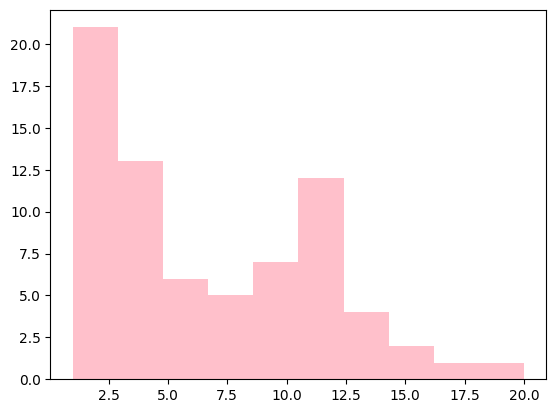

In [110]:
# 3

df_customers['age'].value_counts().hist( title='customer segmentation', ylabel='number of customers', xlabel='age', color=['pink'])


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

'df_customers'

,id,first_name,last_name,gender,age,nationallity,joining_date,phone_number,email
0,1,Eadie,Maffeo,Female,41.0,France,11/01/2022,534-341-9052,emaffeo0@smh.com.au
1,2,Hammad,Brewerton,Male,56.0,Isreal,30/09/2022,999-994-0510,hbrewerton1@discovery.com
2,3,Terrell,Bris,Male,43.0,India,NaN,980-455-5208,tbris2@yale.edu
3,4,Frannie,Morewood,Male,84.0,France,26/05/2021,979-187-1493,fmorewood3@vistaprint.com
4,5,Sophi,Fleet,Female,33.0,Sweden,19/07/2021,991-853-9984,sfleet4@unicef.org
...,...,...,...,...,...,...,...,...,...
495,496,Renado,Monard,Male,53.0,India,NaN,399-472-4819,rmonarddr@yale.edu
496,497,Kalina,Luno,Female,30.0,Italy,16/10/2022,659-768-2522,klunods@friendfeed.com
497,498,Viv,Callander,Female,44.0,France,24/02/2021,447-685-9318,vcallanderdt@icq.com
498,499,Georg,Raper,Male,41.0,Germany,24/04/2022,863-207-4830,graperdu@homestead.com


<Axes: title={'center': 'customers age segmentation'}, xlabel='age group', ylabel='number of customers'>

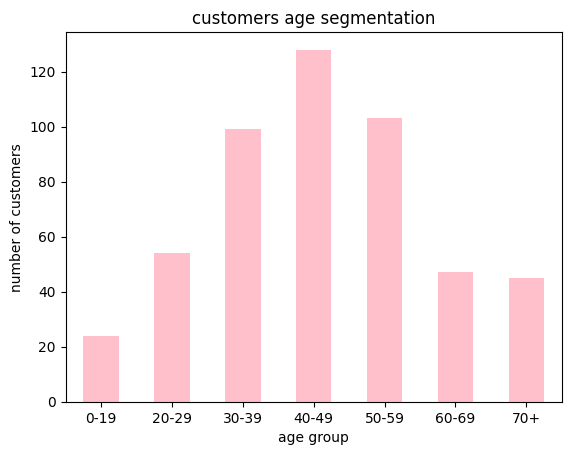

In [31]:
#  4
df_customers = pd.read_csv("customers.csv")
display("df_customers" ,df_customers)

def age_group(age):
    if age <= 19:
        return '0-19'
    elif age <= 29:
        return '20-29'
    elif age <= 39:
        return '30-39'
    elif age <= 49:
        return '40-49'
    elif age <= 59:
        return '50-59'
    elif age <= 69:
        return '60-69'
    else:
        return '70+'

df_customers['age_group'] = df_customers['age'].apply(age_group); df_customers['age_group'].value_counts().reindex(['0-19','20-29','30-39','40-49','50-59','60-69','70+']).plot(kind='bar', color='pink', title='customers age segmentation', xlabel='age group', ylabel='number of customers', rot=0)

<Axes: title={'center': 'orders segmentation'}, xlabel='order_date', ylabel='number of orders'>

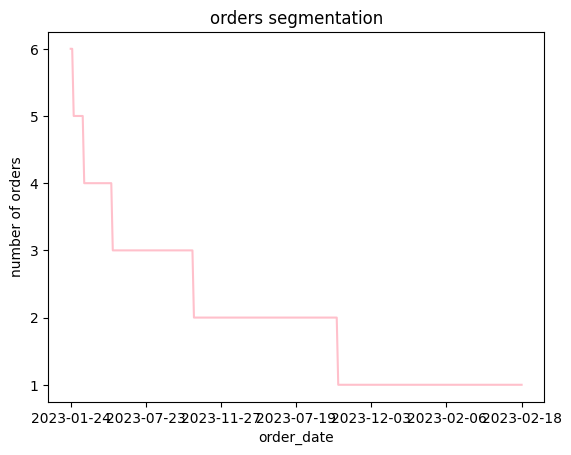

In [114]:
# 5

df_orders['order_date'].value_counts().plot( title='orders segmentation', ylabel='number of orders', xlabel='order_date', color=['pink'])


'df_orders'

,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source
0,1,477.0,576 Cordelia Place,2.0,2023-12-05,GIFT_CARD,WEBSITE
1,2,93.0,4664 6th Drive,4.0,2023-08-17,CASH,STORE
2,3,474.0,8766 4th Point,4.0,2023-02-25,CHECK,STORE
3,4,333.0,31 Bonner Way,3.0,2023-02-04,CASH,STORE
4,5,436.0,20352 Shelley Way,5.0,2023-06-01,CASH,STORE
...,...,...,...,...,...,...,...
595,596,110.0,26 Hudson Lane,5.0,2023-10-30,CREDIT_CARD,WEBSITE
596,597,209.0,37392 Sullivan Park,4.0,2023-08-23,CREDIT_CARD,WEBSITE
597,598,480.0,1473 Ilene Drive,4.0,2023-09-11,CASH,STORE
598,599,72.0,2 Nancy Crossing,4.0,2023-02-09,CASH,STORE


C:\Users\naama\AppData\Local\Temp\ipykernel_3048\4153664500.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_counts = df_orders.groupby('age_group')['order_id'].nunique().reindex(['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+'])
C:\Users\naama\AppData\Local\Temp\ipykernel_3048\4153664500.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purchase_counts.index, y=purchase_counts.values, palette='pink')


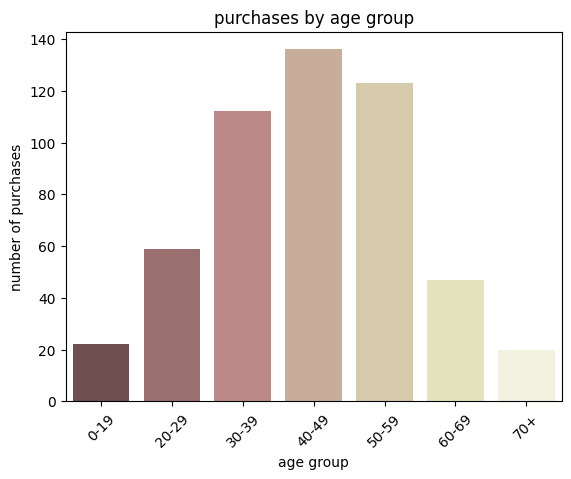

In [37]:
# 6
df_orders = pd.read_csv("orders.csv")
display("df_orders" ,df_orders)
df_orders = df_orders.merge(df_customers[['id', 'age']], left_on='customer_id', right_on='id', how='left')
df_orders['age_group'] = pd.cut(df_orders['age'], bins=[0, 19, 29, 39, 49, 59, 69, 120], labels=['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+'])

purchase_counts = df_orders.groupby('age_group')['order_id'].nunique().reindex(['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+'])

sns.barplot(x=purchase_counts.index, y=purchase_counts.values, palette='pink')
plt.title('purchases by age group')
plt.xlabel('age group')
plt.ylabel('number of purchases')
plt.xticks(rotation=45)
plt.show()